# Customer Segmentation with K-Means Wine Data

### Import Required Libraries 

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

### Load CSV

In [2]:
wine_df = pd.read_csv('Unit06 wine.csv')
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Pre-processing

The k-means algorithm relies on the Euclidean distance, making it unsuitable for categorical variables due to their discrete nature. The absence of a meaningful distance measure for categories can lead to inaccurate clustering. To address this, it is recommended to exclude categorical variables from the k-means analysis, in this case all columns have a numeric type.

In [3]:
wine_df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

### Normalizing over the standard deviation

Normalization is a crucial step in preparing a dataset for mathematical-based algorithms. The process involves scaling features to have a consistent scale, making it easier for algorithms to interpret variables with different magnitudes and distributions. In other words, normalization ensures that each feature contributes equally to the model, preventing variables with larger scales from disproportionately influencing the algorithm. In this example, the standardScaler() function is employed to normalise the dataset by scaling the features based on their standard deviation. This standardisation simplifies the mathematical computations for algorithms, enhancing their performance and accuracy in handling diverse feature magnitudes and distributions.

In [4]:
#The first column is excluded as it contains the target variable or an identifier and the remaining columns are the features.
X = wine_df.values[:,1:]
#Replace any NaN with 0. This ensures numerical stability in subsequent calculations, 
#especially using algorithms that cannot handle missing values.
X = np.nan_to_num(X)
#The fit_transform method calculates the mean and standard deviation of each feature and scales the data accordingly. 
#This process ensures that the features have a mean of 0 and a standard deviation of 1, 
#making them comparable and avoiding issues related to differences in magnitudes.
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Modeling

In [5]:
#Choose number of Clusters
clusterNum = 3
# n_clusters =Specified number of clusters, init = nitialization method (init="k-means++"). 
# n_init controls the number of times the algorithm will be run with different centroid seeds to find the best group.
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
#The fit method involves iteratively assigning data points to clusters and updating the cluster centroids until convergence.
k_means.fit(X)
#Each data point is assigned to one of the specified clusters (0, 1, or 2 in this case).
labels = k_means.labels_
print(labels)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


# Insights

In [6]:
#Assign label to each row in the df
wine_df["Clus_km"] = labels
wine_df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Clus_km
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [7]:
#Check centroid values by finding the mean of each cluster
wine_df.groupby('Clus_km').mean()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Clus_km,,,,,,,,,,,,,,
0,1.021277,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936
1,2.275362,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884
2,2.258065,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710


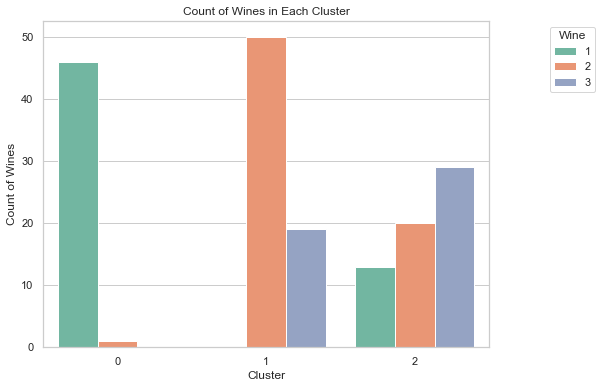

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Clus_km', hue='Wine', data=wine_df, palette='Set2')

# Set plot labels and title
plt.xlabel('Cluster')
plt.ylabel('Count of Wines')
plt.title('Count of Wines in Each Cluster')

# Display the legend
plt.legend(title='Wine', loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


The graph shows that the clusters do not completely match the label of wine based on the characteristics such as alcohol content and magnesium. The fact that Cluster 0 predominantly contains Wine 1, while Cluster 2 encompasses a mix of all three wines, suggests that the wines do not exhibit distinct, easily separable patterns solely based on the examined characteristics.

This observation implies that the features used for clustering, such as alcohol content and magnesium levels, may not be sufficient to reliably identify the wines independently. There might be a considerable overlap in these features among different wine types, making it challenging to predict the wine type accurately based solely on the analyzed characteristics.